# Projeto Integrado Quantum Finance        

Curso: Data Science and Artificial Intelligence - 9DTSR

Disciplina: Feature Engineering 

Data: 2024

Prof.: Filipe Pacheco

Grupo(RMs): 357385, 358416, 357198, 358440

# 1 Importação das Bibliotecas Necessárias

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV    
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from imblearn.over_sampling import SMOTE    
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.linear_model import LogisticRegression


# 2 Carregar o Dataset

In [451]:
df = pd.read_csv('Base_ScoreCredito_QuantumFinance.csv', delimiter=';', decimal=',')    
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


# 3 Análise Exploratória de Dados (EDA) - Básica

## 3.1 Sumarização Estatística

In [453]:
print("\n Estatísticas Descritivas")
df.describe(include='all')


 Estatísticas Descritivas


,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,1.012700e+04,10127.000000,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,casado,ensino medio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,4687,3352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,46.325960,NaN,NaN,NaN,1.547447,34.133208,0.911919,70.209002,3.783450,0.352424,208.999111,1.083638,0.623383,469.500364
std,3.690378e+07,8.016814,NaN,NaN,NaN,1.489079,8.221428,0.283427,55.567032,1.580486,0.477749,378.495229,0.333784,0.569796,133.814653
min,7.080821e+08,26.000000,NaN,NaN,NaN,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.130368e+08,41.000000,NaN,NaN,NaN,0.000000,30.000000,1.000000,21.330536,3.000000,0.000000,0.000000,1.000000,0.000000,375.000000
50%,7.179264e+08,46.000000,NaN,NaN,NaN,1.000000,34.000000,1.000000,66.486331,4.000000,0.000000,0.000000,1.000000,1.000000,449.600000
75%,7.731435e+08,52.000000,NaN,NaN,NaN,3.000000,39.000000,1.000000,107.544225,5.000000,1.000000,289.000000,1.000000,1.000000,540.900000


## 3.3 Criação de uma variável de Renda Per Capta

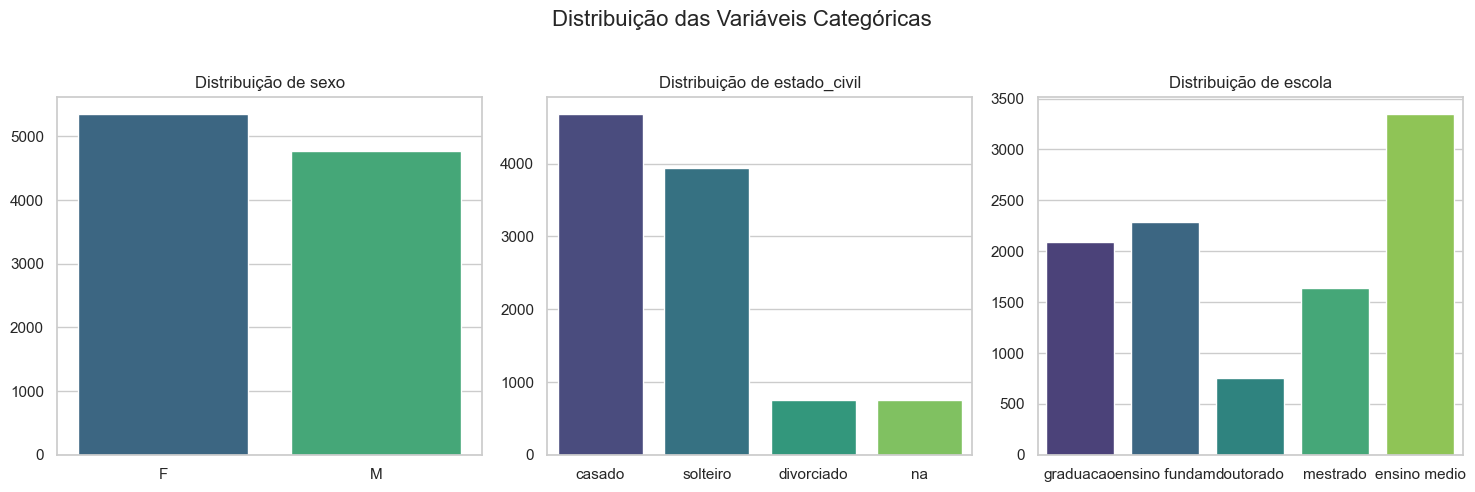

In [454]:
df['renda_por_dependente'] = df['vl_salario_mil'] / (df['Qte_dependentes'] + 1)

## 3.2 Distribuição de Variaveis Categóricas

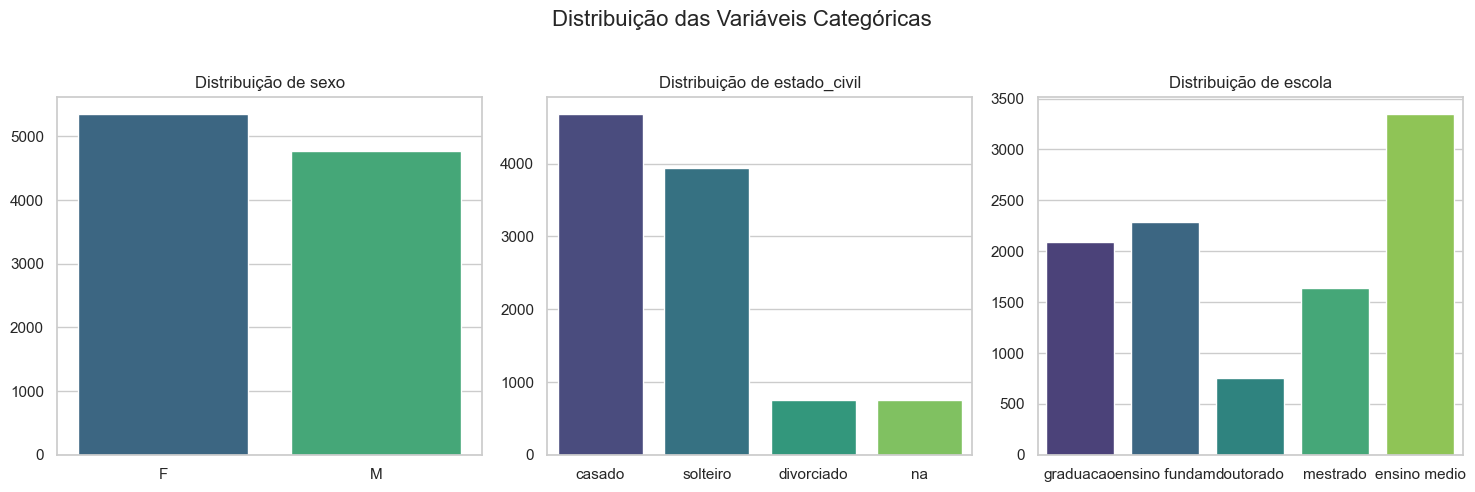

In [455]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Ajustar o número de subplots para corresponder ao número de colunas categóricas
num_cols = len(df.select_dtypes(include=['object']).columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

categorical_columns = df.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns):
    if num_rows == 1:
        ax = axs[i % 3]
    else:
        ax = axs[i // 3, i % 3]
    sns.countplot(x=df[column], ax=ax, hue=df[column], palette='viridis')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')   

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    if num_rows == 1:
        fig.delaxes(axs[j % 3])
    else:
        fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 3.3 Distribuição de Variaveis Numericas

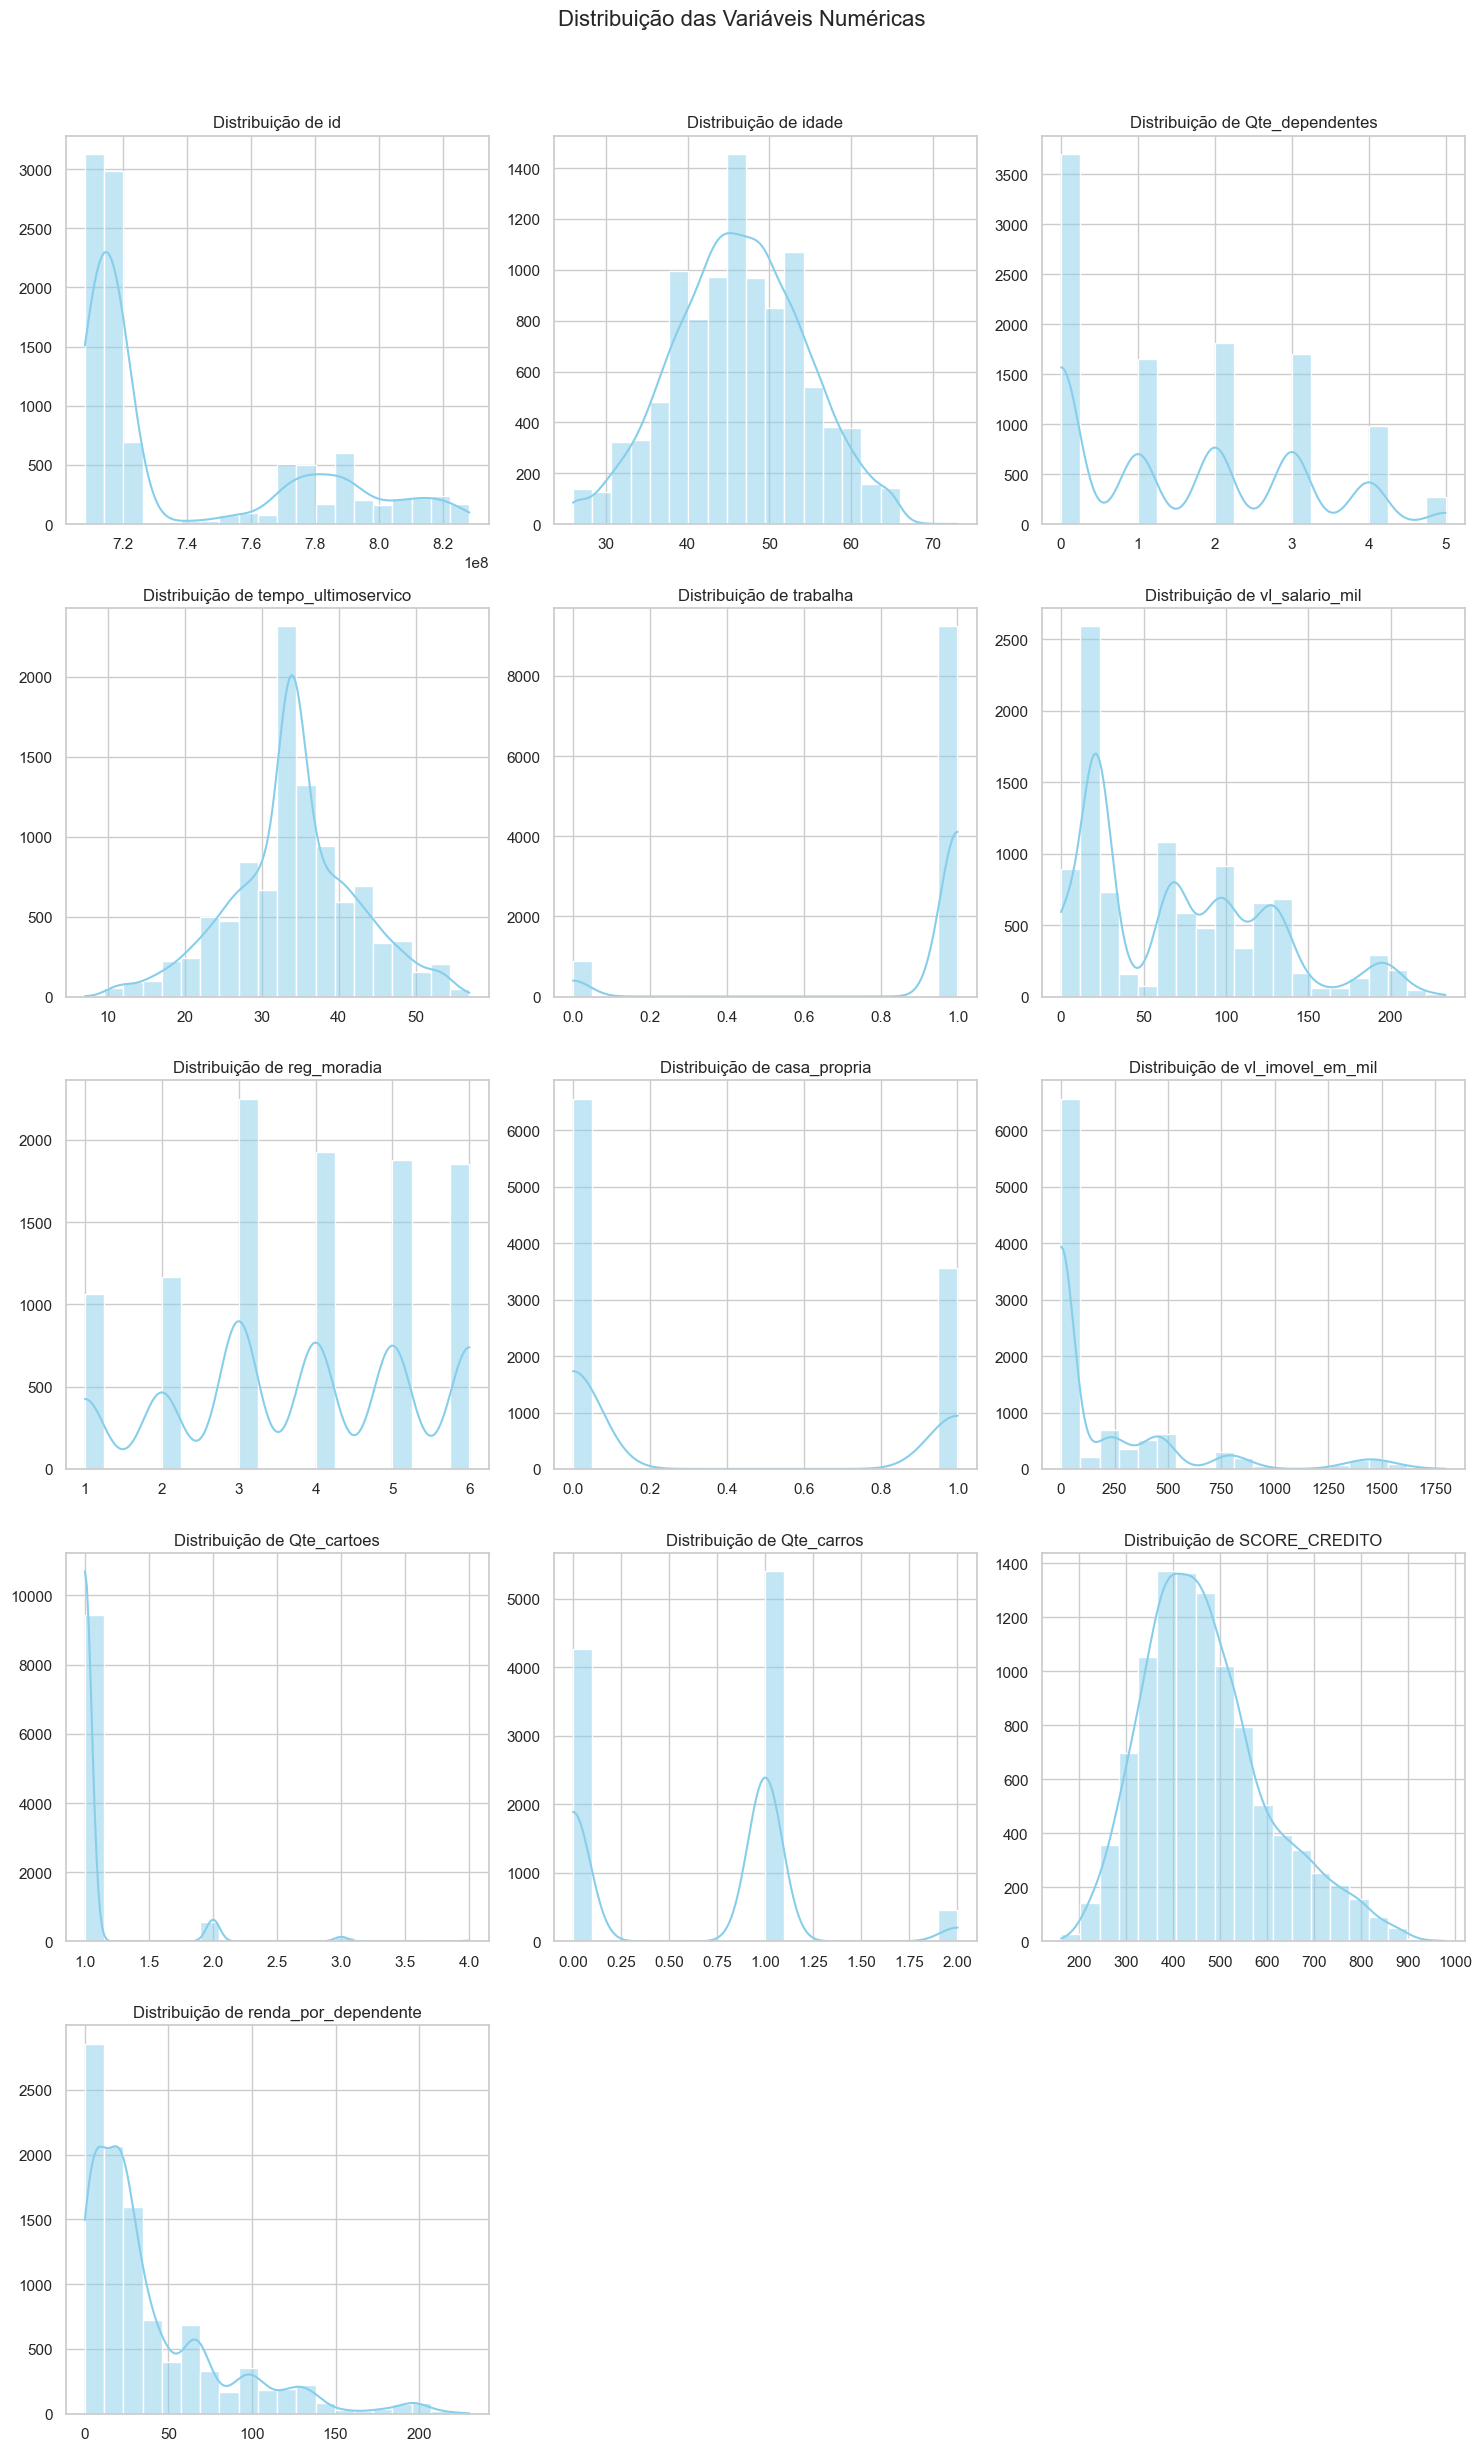

In [456]:
# Ajustar o número de subplots para corresponder ao número de colunas numéricas 
numerical_columns = df.select_dtypes(include=['number']).columns
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)


for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.4 Boxplots para variaveis numéricas

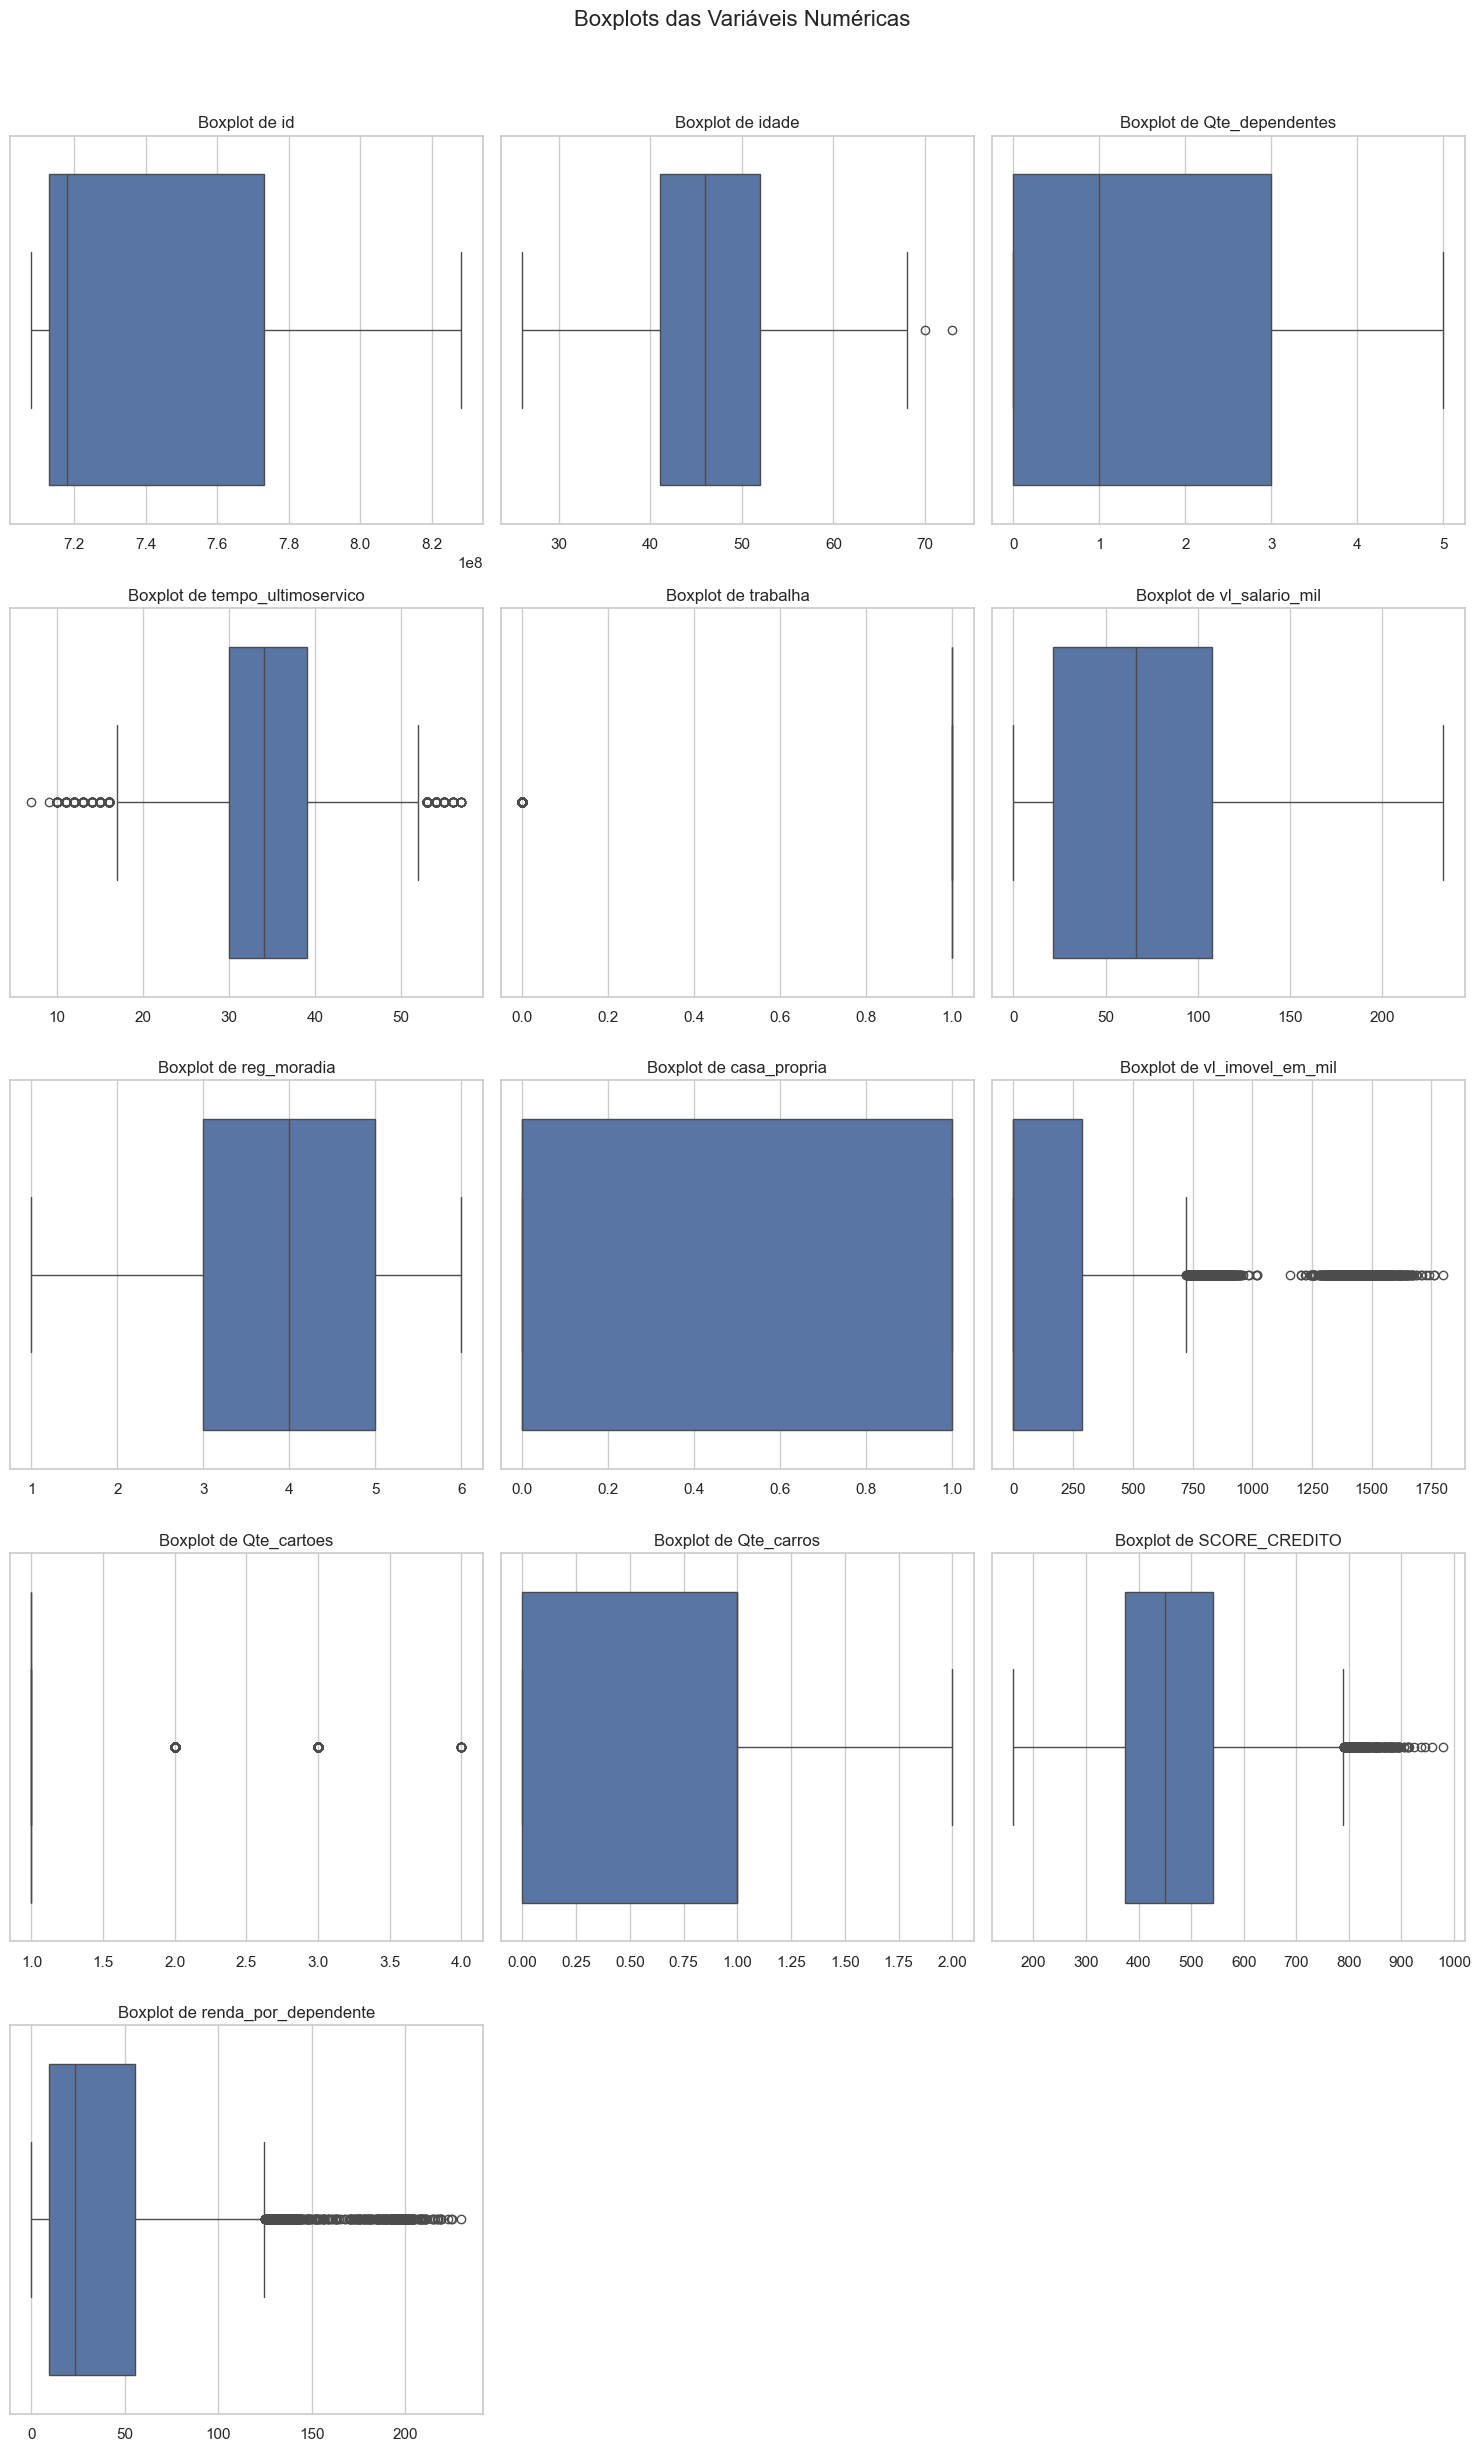

In [457]:
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=16)

for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [458]:
def CalculaIQR(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

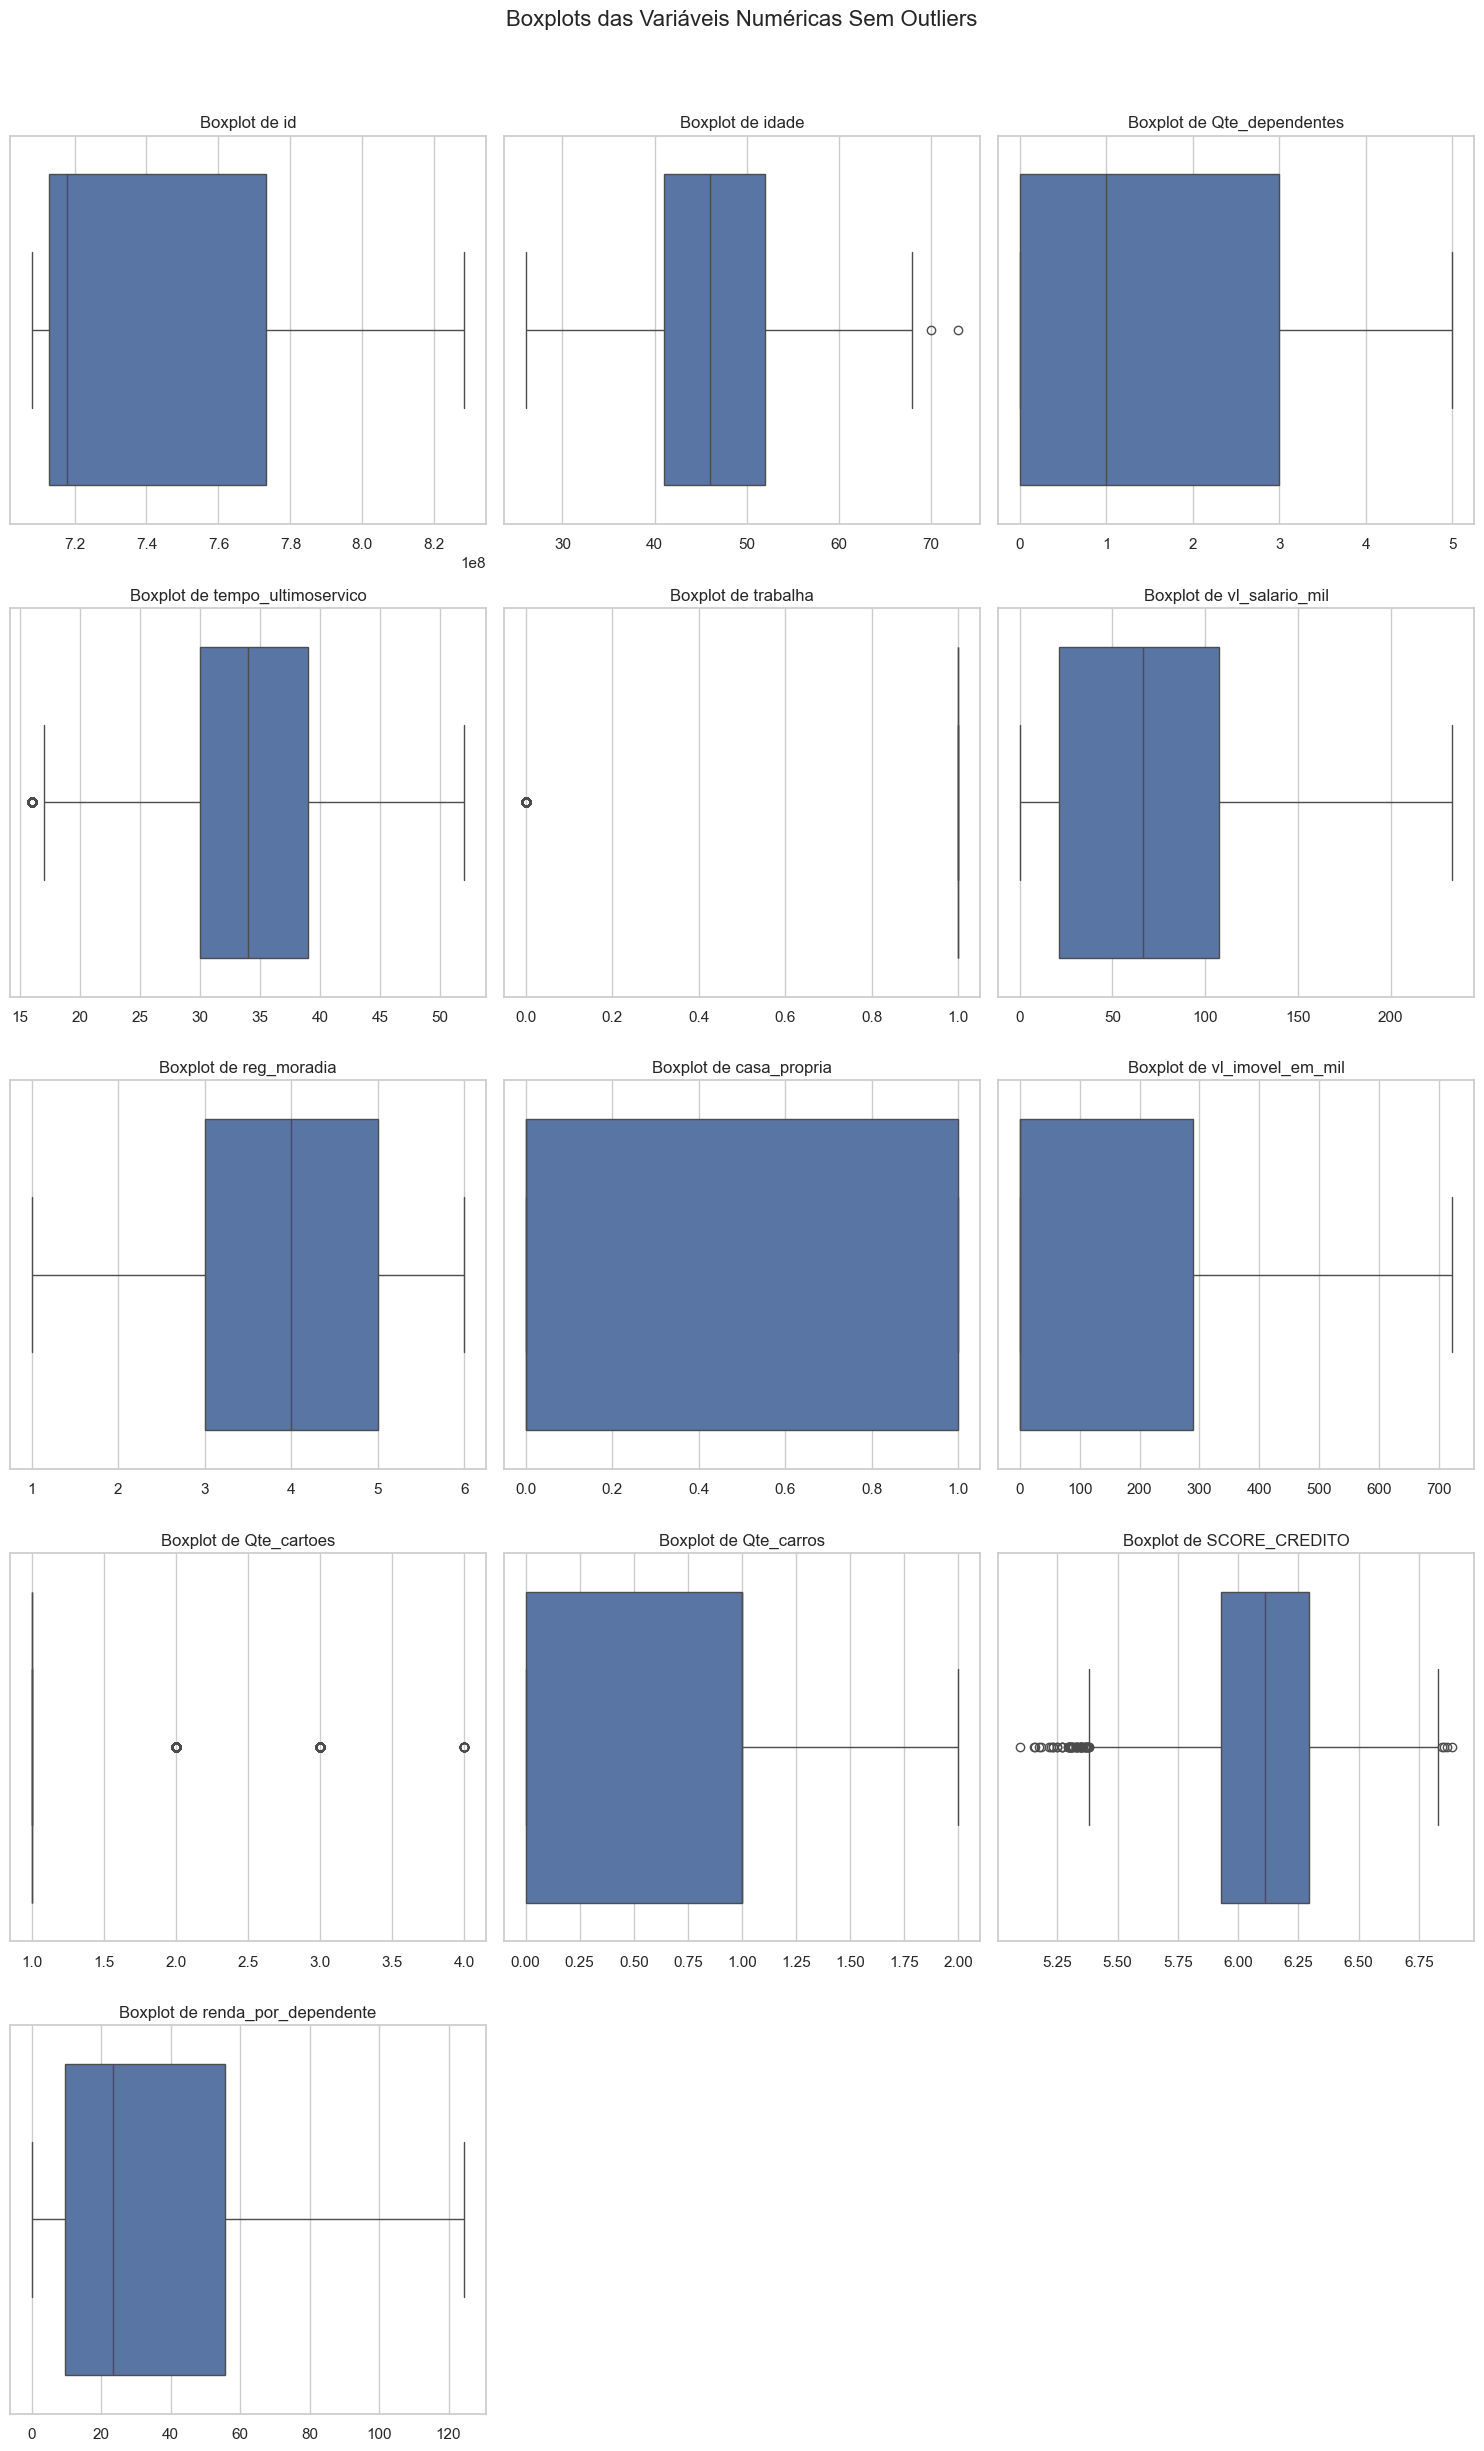

In [459]:
df_removed_outliers = df
Q1,Q3,IQR =  CalculaIQR('vl_imovel_em_mil')
valor_imovel_limit =Q3 + 1.5* IQR 

df_removed_outliers.loc[df_removed_outliers['vl_imovel_em_mil'] > valor_imovel_limit, 'vl_imovel_em_mil'] = int(valor_imovel_limit)
Q1,Q3,IQR =  CalculaIQR('tempo_ultimoservico')

valor_temp_servico_min = Q1 - 1.5* IQR 
valor_temp_servico_max = Q3 + 1.5* IQR 
df_removed_outliers.loc[(df_removed_outliers['tempo_ultimoservico'] > valor_temp_servico_max, 'tempo_ultimoservico')]  = int(valor_temp_servico_max)
df_removed_outliers.loc[(df_removed_outliers['tempo_ultimoservico'] < valor_temp_servico_min, 'tempo_ultimoservico')]  = int(valor_temp_servico_min)

Q1,Q3,IQR =  CalculaIQR('renda_por_dependente')
valor_renda_limit =Q3 + 1.5* IQR 
df_removed_outliers.loc[df_removed_outliers['renda_por_dependente'] > valor_renda_limit, 'renda_por_dependente'] = int(valor_renda_limit)

df['SCORE_CREDITO'] = np.log1p(df['SCORE_CREDITO'])

 
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Boxplots das Variáveis Numéricas Sem Outliers', fontsize=16) 

for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.boxplot(x=df_removed_outliers[column], ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.5 Matriz de Correlação

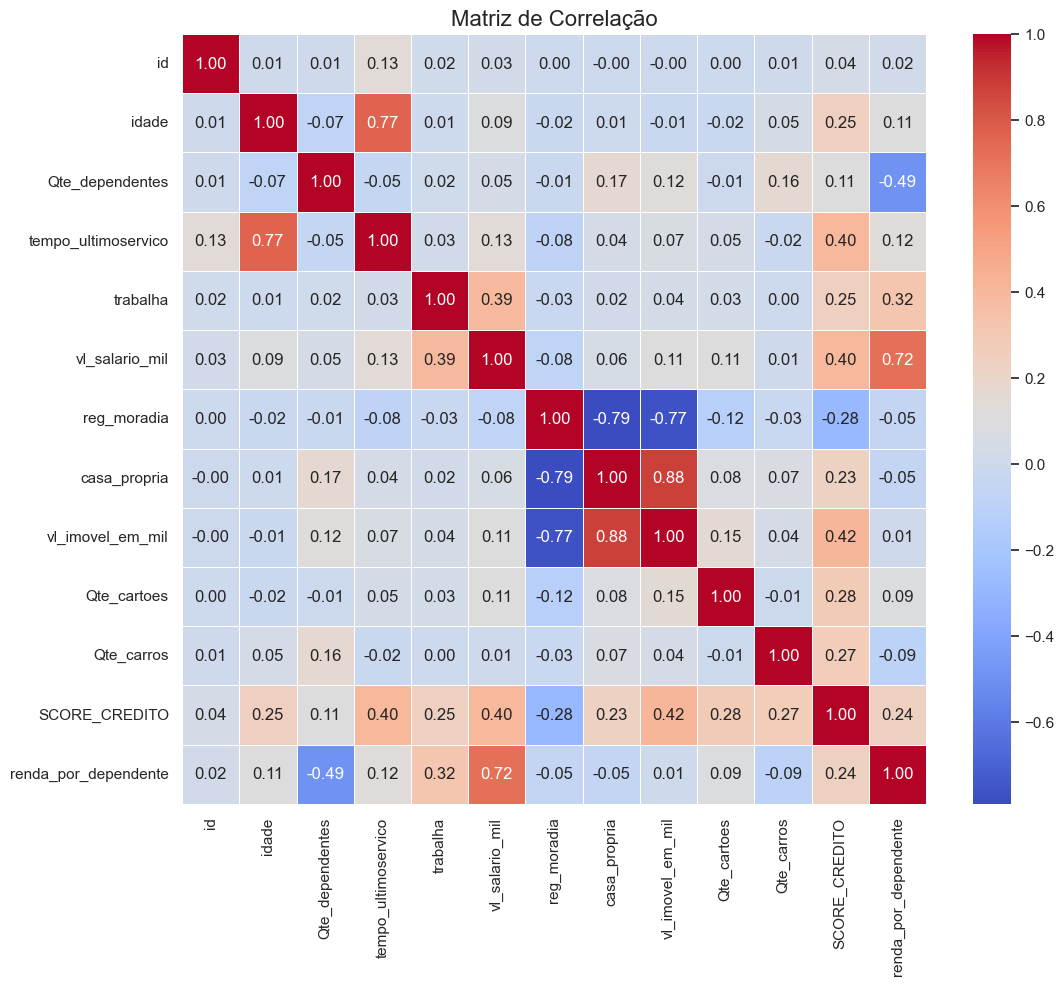

In [460]:
#Com a matriz de correlação podemos determinar quais variáveis estão mais fortemente relacionadas entre si.    
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Interpretando os Valores
- Correlação Forte: Valores próximos de 1 ou -1 indicam uma forte relação positiva ou negativa.     

idade X tempo_ultimoservico; vl_salario_mil X renda_por_dependente; reg_moradia X casa_propria  e reg_moradia X vl_imovel_em_mil; *casa_propria X vl_imovel_em_mil  

- Correlação Moderada: Valores entre 0.3 e 0.7 ou entre -0.3 e -0.7 indicam uma relação moderada.   
 
*qte_dependente X renda_por_dependente; tempo_ultimoservico X SCORE_CREDITO; trabalha X vl_salario_mil e trabalha X renda_por_dependente; vl_salario_mil X SCORE_CREDITO; vl_imovel_em_mil X SCORE_CREDITO;   

- Correlação Fraca: Valores próximos de 0 indicam uma relação fraca ou inexistente.

# 4 Pré-Processamento dos Dados

## 4.1 Encoding Categorical

In [461]:
# Validação de dados faltantes
print("\n### Dados Faltantes ###")  
df.replace('na', np.nan, inplace=True)

# Preenchendo de dados faltantes
df.fillna(df.mode()['estado_civil'][0], inplace=True)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent}))    

# Validação de registros duplicados   
print(f"\n### Total de registros duplicados: {df.duplicated().sum()} ###")  

# Remocao da coluna ID, pois não é relevante para análise
X = df.drop(columns=['id'])

# Identificando as variáveis categóricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns 

# Copiando dataset
df_encoded = df.copy()

# Aplicando o one hot encoding apenas às variáveis categóricas
#X_categorical_encoded = pd.get_dummies(X[categorical_columns], drop_first=True).astype(int)    

# Enconding variáveis categóricas com LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Mantendo as variáveis numéricas como estão
X_numerical = X[numerical_columns]

# Concatenando variáveis categóricas codificadas e variáveis numéricas
X_encoded = pd.concat([X_numerical, X[categorical_columns]], axis=1)
#X_encoded = pd.concat([X_numerical, X_categorical_encoded], axis=1) 



### Dados Faltantes ###
                      Missing Values  Percentage
id                                 0         0.0
idade                              0         0.0
sexo                               0         0.0
estado_civil                       0         0.0
escola                             0         0.0
Qte_dependentes                    0         0.0
tempo_ultimoservico                0         0.0
trabalha                           0         0.0
vl_salario_mil                     0         0.0
reg_moradia                        0         0.0
casa_propria                       0         0.0
vl_imovel_em_mil                   0         0.0
Qte_cartoes                        0         0.0
Qte_carros                         0         0.0
SCORE_CREDITO                      0         0.0
renda_por_dependente               0         0.0

### Total de registros duplicados: 0 ###


In [462]:
X_encoded.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,renda_por_dependente,sexo,estado_civil,escola
0,45,3,40,1,40.089665,3,0,0,1,1,6.658011,10.022416,0,0,3
1,58,0,44,1,66.557645,3,0,0,1,0,5.625100,66.557645,1,2,1
2,46,3,35,1,123.681821,6,0,0,1,1,5.996452,30.920455,1,1,0
3,34,0,22,1,19.715934,6,0,0,1,0,5.853351,19.715934,0,2,4
4,49,2,36,0,0.000000,3,1,437,1,2,6.167516,0.000000,0,0,4


## 4.2 Normalização

In [463]:
# Normalização
scaler = StandardScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns) 

In [464]:
X_encoded_scaled.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,renda_por_dependente,sexo,estado_civil,escola
0,-0.165406,0.975519,0.732257,0.310788,-0.542063,-0.495726,-0.737713,-0.649008,-0.250587,0.661001,1.930484,-0.748998,-0.943436,-0.896500,0.725721
1,1.456266,-1.039249,1.233623,0.310788,-0.065714,-0.495726,-0.737713,-0.649008,-0.250587,-1.094100,-1.737104,0.809539,1.059956,1.206547,-0.992226
2,-0.040662,0.975519,0.105551,0.310788,0.962359,1.402517,-0.737713,-0.649008,-0.250587,0.661001,-0.418533,-0.172890,1.059956,0.155024,-1.851199
3,-1.537589,-1.039249,-1.523887,0.310788,-0.908732,1.402517,-0.737713,-0.649008,-0.250587,-1.094100,-0.926646,-0.481771,-0.943436,1.206547,1.584694
4,0.333570,0.303929,0.230892,-3.217629,-1.263563,-0.495726,1.355540,1.085021,-0.250587,2.416101,0.188870,-1.025291,-0.943436,-0.896500,1.584694


## 4.3 Redução de Dimensionalidade

### 4.3.1 PCA 

In [465]:
# PCA - tecnica de redução de dimensionalidade linear
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded_scaled)

### 4.3.2 t-SNE

In [466]:
# t-SNE - tecnica de redução de dimensionalidade NÃO linear 
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_encoded_scaled)

### 4.3.3 LDA

In [467]:
# LDA - tecnica de redução de dimensionalidade linear   
y = df['tempo_ultimoservico']
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_encoded_scaled, y)

### 4.3.4 Visualização

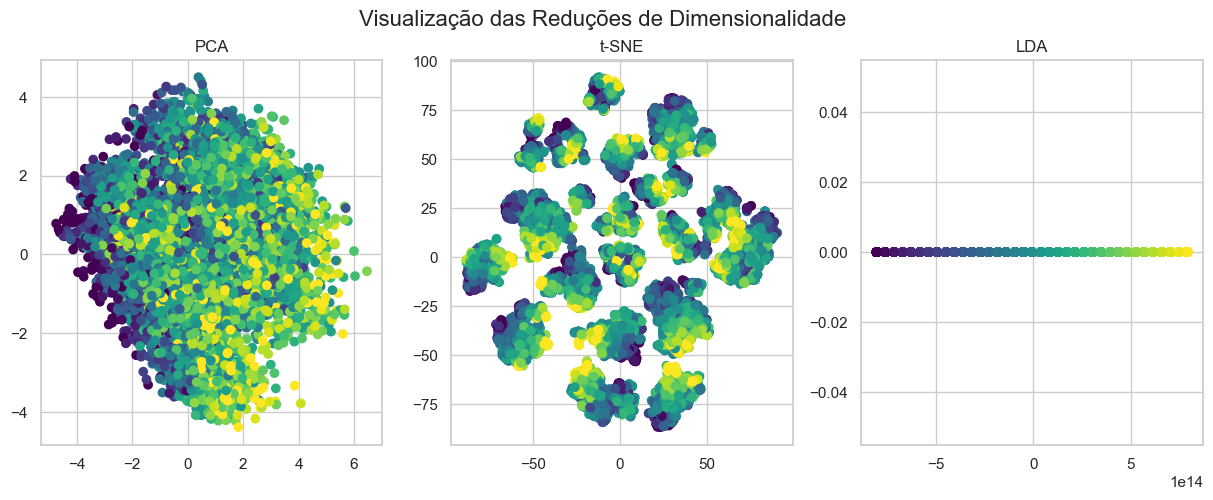

In [468]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
#plt.xlabel('Componente t-SNE 1')
#plt.ylabel('Componente t-SNE 2')

plt.subplot(1, 3, 3)    
plt.title('LDA')
if X_lda.shape[1] > 1:
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
    #plt.xlabel('Componente LDA 1')
    #plt.ylabel('Componente LDA 2')
else:
    plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis')
    #plt.xlabel('Componente LDA 1')
    #plt.ylabel('')

plt.suptitle('Visualização das Reduções de Dimensionalidade', fontsize=16)
plt.show()

- PCA: Verificar o porque depois que tirou os outiliers ele nao conseguiu fazer uma boa distribuição em 2 dimensoes (x e y)... antes ele criou o hiperplano e a separação nao estava muito boa mas melhor que agora    
- t-SNE: visivel que criou estruturas menores

## 4.4 Balanceamento de Classes

### 4.4.1 OverSampling - Balanceamento via SMOTE

In [469]:
# Balanceamento de classes
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_encoded_scaled, y)  

#lembrando que nao fazemos oversampling no conjunto de teste porque ele é usado para avaliar o modelo, só no conjunto de treino

In [470]:
X_smote.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,renda_por_dependente,sexo,estado_civil,escola
0,-0.165406,0.975519,0.732257,0.310788,-0.542063,-0.495726,-0.737713,-0.649008,-0.250587,0.661001,1.930484,-0.748998,-0.943436,-0.896500,0.725721
1,1.456266,-1.039249,1.233623,0.310788,-0.065714,-0.495726,-0.737713,-0.649008,-0.250587,-1.094100,-1.737104,0.809539,1.059956,1.206547,-0.992226
2,-0.040662,0.975519,0.105551,0.310788,0.962359,1.402517,-0.737713,-0.649008,-0.250587,0.661001,-0.418533,-0.172890,1.059956,0.155024,-1.851199
3,-1.537589,-1.039249,-1.523887,0.310788,-0.908732,1.402517,-0.737713,-0.649008,-0.250587,-1.094100,-0.926646,-0.481771,-0.943436,1.206547,1.584694
4,0.333570,0.303929,0.230892,-3.217629,-1.263563,-0.495726,1.355540,1.085021,-0.250587,2.416101,0.188870,-1.025291,-0.943436,-0.896500,1.584694


## 4.5 Seleção de Features

### 4.5.1 Seleção com Chi-Square

In [471]:
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[chi2_selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil',
       'renda_por_dependente'],
      dtype='object')


In [472]:
# Calculando os valores do chi-quadrado e os p-valores
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Certificando-se de que os comprimentos são iguais
assert len(X_encoded.columns) == len(chi2_scores) == len(chi2_pvalues), "Os comprimentos das colunas, scores e p-valores não coincidem."

# Criando um DataFrame para exibir os resultados de forma organizada
chi2_results = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': chi2_scores,
    'p-Value': chi2_pvalues
})

# Ordenando o DataFrame com base no score chi-quadrado
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Exibindo os resultados
print("\nChi2 Scores for all features:\n", chi2_results_sorted)


Chi2 Scores for all features:
                  Feature    Chi2 Score        p-Value
7       vl_imovel_em_mil  59948.229148   0.000000e+00
2    tempo_ultimoservico  18871.260401   0.000000e+00
4         vl_salario_mil  12673.731932   0.000000e+00
11  renda_por_dependente   8406.255860   0.000000e+00
0                  idade   8343.841331   0.000000e+00
1        Qte_dependentes    703.523025  9.739047e-125
9             Qte_carros    237.616425   1.548595e-31
5            reg_moradia     80.778804   2.754737e-05
13          estado_civil     58.110935   1.122310e-02
6           casa_propria     54.389542   2.525157e-02
12                  sexo     29.412147   7.732565e-01
14                escola     26.060625   8.887909e-01
10         SCORE_CREDITO     24.198972   9.331416e-01
8            Qte_cartoes     11.089078   9.999790e-01
3               trabalha      4.298919   1.000000e+00


# 5 Treinamento de um Modelo de Machine Learning

## 5.1 Treinamento e Avaliação - Dados brutos

In [473]:
# Using the encoded and scaled features for training and testing
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.3, random_state=42)
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

Accuracy: 0.3231326094109905


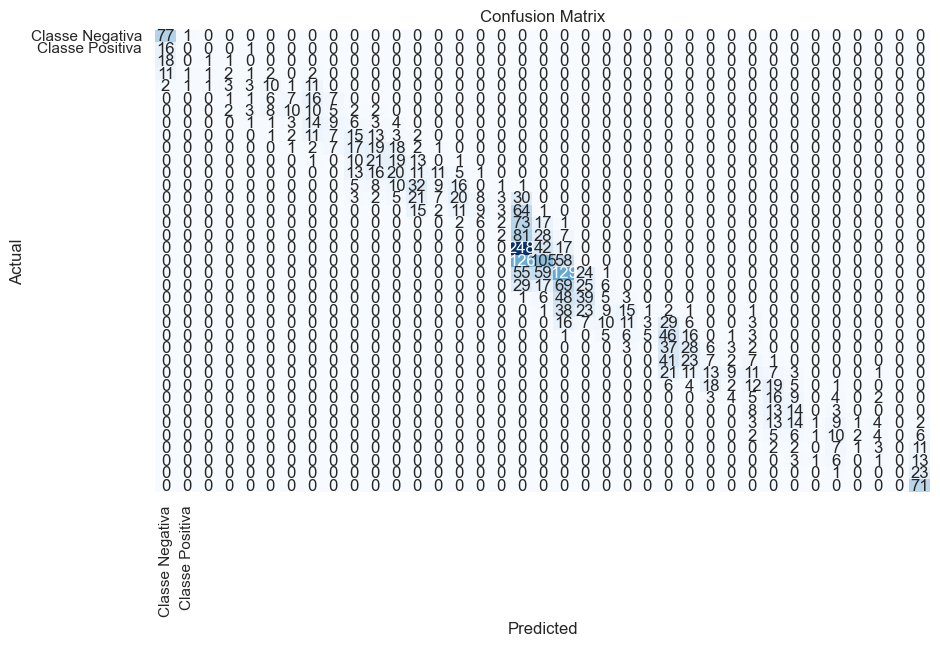

In [474]:
# Supondo que y são os valores reais e y_pred_scaled são as previsões do modelo
accuracy = accuracy_score(y_test, y_pred_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_scaled)

# Exibindo a acurácia
print("Accuracy:", accuracy)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe Negativa', 'Classe Positiva'], 
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.2 Treinamento e Avaliação - Dados tratados

In [475]:
X_kbest_train, X_kbest_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)
model_kbest = LogisticRegression()
model_kbest.fit(X_kbest_train, y_train)
y_pred_kbest = model_kbest.predict(X_kbest_test)

c:\Users\Raphael\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.10760118460019744


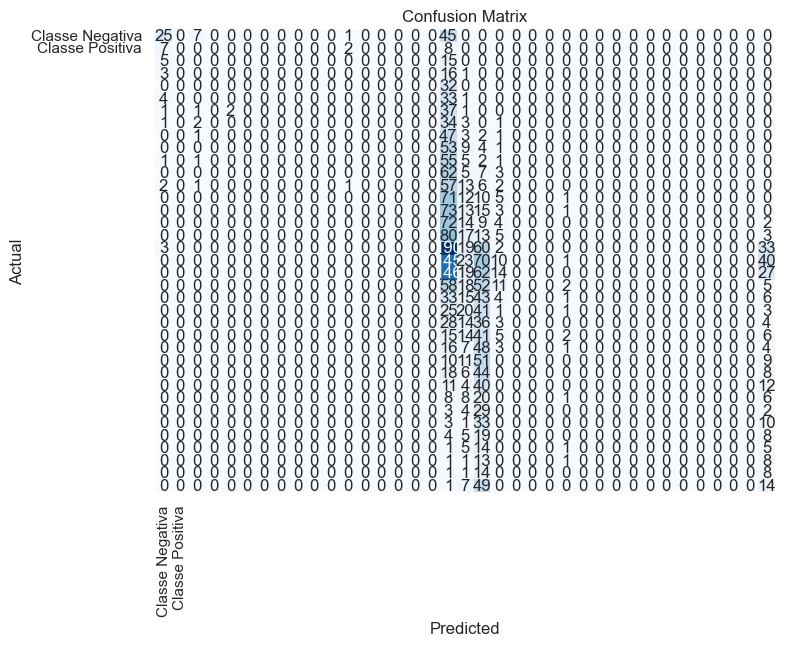

In [476]:
# Supondo que y são os valores reais e y_pred_kbest são as previsões do modelo
accuracy = accuracy_score(y_test, y_pred_kbest)
conf_matrix = confusion_matrix(y_test, y_pred_kbest)

# Exibindo a acurácia
print("Accuracy:", accuracy)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe Negativa', 'Classe Positiva'], 
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [477]:
X = df.drop(columns=['SCORE_CREDITO'])    
y = df['SCORE_CREDITO'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)       

X_train.head(), X_test.head(), y_train.head(), y_test.head()


(             id  idade sexo estado_civil         escola  Qte_dependentes  \
 9066  797218233     51    F     solteiro  ensino fundam                0   
 5814  719518308     48    M       casado  ensino fundam                2   
 792   709709283     38    M     solteiro  ensino fundam                0   
 1791  711676008     52    F     solteiro   ensino medio                0   
 5011  717797658     57    F       casado   ensino medio                2   
 
       tempo_ultimoservico  trabalha  vl_salario_mil  reg_moradia  \
 9066                   44         1       23.283672            5   
 5814                   33         1      124.504837            5   
 792                    17         1       59.851922            1   
 1791                   42         1       21.936889            5   
 5011                   43         1       25.264053            6   
 
       casa_propria  vl_imovel_em_mil  Qte_cartoes  Qte_carros  \
 9066             0                 0            1    

## 5.3 Treinando e Avaliando

In [478]:
# Definir a grade de parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Aplicar GridSearchCV para otimizar hiperparâmetros
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Melhor modelo após o tuning
    best_model = grid_search.best_estimator_
    
    # Avaliar com validação cruzada
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse_scores = -cv_scores
    print("MSE por fold (validação cruzada):", cv_mse_scores)
    print("Média do MSE (validação cruzada):", cv_mse_scores.mean())
    print("Desvio padrão do MSE (validação cruzada):", cv_mse_scores.std())
    
    # Fazer previsões no conjunto de teste
    y_pred = best_model.predict(X_test)
    
    # Calcular métricas de avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Erro Quadrático Médio (MSE):", mse)
    print("Erro Absoluto Médio (MAE):", mae)
    print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
    print("Coeficiente de Determinação (R²):", r2)
    print("Valores previstos:", y_pred)

In [479]:
train_and_evaluate(X_encoded_scaled, y)

MSE por fold (validação cruzada): [6.28192735e-07 5.95233185e-07 3.03228525e-07 1.01423525e-05
 4.62847679e-07]
Média do MSE (validação cruzada): 2.4263709174472406e-06
Desvio padrão do MSE (validação cruzada): 3.859690104726989e-06
Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Erro Quadrático Médio (MSE): 4.0686756948169484e-07
Erro Absoluto Médio (MAE): 0.00014130269501420195
Raiz do Erro Quadrático Médio (RMSE): 0.0006378617165825951
Coeficiente de Determinação (R²): 0.9999948475110094
Valores previstos: [5.92157198 6.25389225 6.0958133  ... 6.17568945 6.32615672 6.0872269 ]
